In [48]:
# For plotting 2D histograms comparing model prediction and ground truth of the virtual telescope problem. 
import numpy as np
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import matplotlib.pyplot as plt

from scipy.interpolate import interp2d

In [30]:
plot_dir = '/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/results/plots/'

In [98]:
def plot_histogram(Y_test, Y_pred, mask_by_confidence=False, title='Model', savefig=None):
    H, xedges, yedges = np.histogram2d(np.log10(Y_test.flatten()), 
                                       np.log10(Y_pred.flatten()), 
                                       bins=200, range=[[-2,1.5],[-2,1.5]], normed=False)
    Hnorm = H/H.sum()
#PuBu_r
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(np.log10(Hnorm.T+1e-20), origin='lower', clim=(-8,0), 
               extent=(xedges.min(), xedges.max(), yedges.min(), yedges.max()),
               cmap='plasma', aspect='equal', interpolation='nearest')
    ax.set_xlabel('Log Real Intensity',fontsize=20)
    ax.set_ylabel('Log Predicted Intensity', fontsize=20)
    #plt.title(title, fontsize=20)
    #plt.colorbar()
    Hcum = Hnorm.copy()
    for i in range(Hnorm.shape[1]):
        Hcum[:,i]=H[:,i].cumsum(axis=0)/H[:,i].sum()
    Hcum[np.where(np.isnan(Hcum))] = 1.0
    mask = np.ones(Hcum.shape)
    mask[np.where(np.abs(Hcum-0.5) <= 0.45)] = np.nan
    if mask_by_confidence:
        ax.imshow(mask.T,extent=(xedges.min(), xedges.max(), yedges.min(), yedges.max()),
               origin='lower', cmap='gray', alpha=1.0)
    #plt.plot([-2,2],[-2,2], linewidth=3)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    plt.tick_params(axis='both', which='major', size=15)
    if savefig == None:
        plt.show()
    else:
        plt.savefig(savefig)

/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


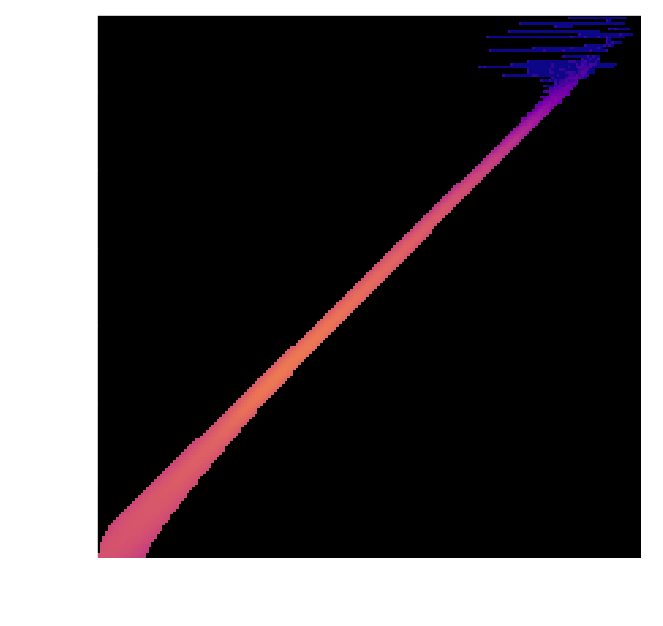

In [99]:
model = 'v_experiment_10'
base = '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/experiments_results_vt'

img_file = '2dhist_{}_google.png'.format(model)
img_file = plot_dir + img_file

file = base+'/'+model+'/0600_'+model+'_test_predictions.npy'
Y = np.load(file)
shape = Y.shape
Y_test = Y[:,:,0:int(shape[2]/2),:]
Y_pred = Y[:,:,int(shape[2]/2):,:]
plot_histogram(Y_test,Y_pred, mask_by_confidence=True, title=m.replace('mark_','').replace('_',' '), savefig=img_file)

/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


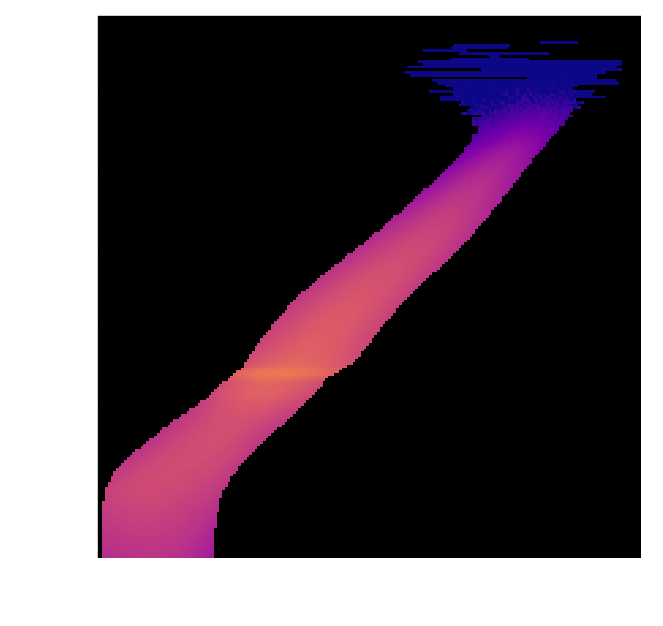

In [100]:
model = 'mark_linear_l1loss'
base = '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/experiments_results_vt'

img_file = '2dhist_{}_google.png'.format(model)
img_file = plot_dir + img_file

file = base+'/'+model+'/0600_'+model+'_test_predictions.npy'
Y = np.load(file)
shape = Y.shape
Y_test = Y[:,:,0:int(shape[2]/2),:]
Y_pred = Y[:,:,int(shape[2]/2):,:]
plot_histogram(Y_test,Y_pred, mask_by_confidence=True, title=m.replace('mark_','').replace('_',' '), savefig=img_file)

In [101]:
def plot_line(savefig=None):
    fig, ax = plt.subplots(figsize=(10,10))
    bg_color = (0,0,0)
    ax.set_facecolor(bg_color)
    ax.set_xlabel('Log Real Intensity',fontsize=20)
    ax.set_ylabel('Log Predicted Intensity', fontsize=20)
    plt.plot([-2,1.5],[-2,1.5], linewidth=3, color='orange')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    if savefig == None:
        plt.show()
    else:
        plt.savefig(savefig)

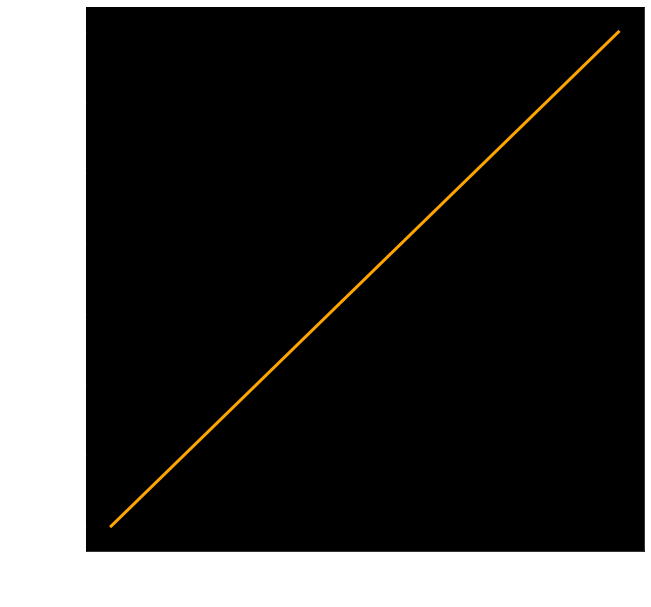

In [102]:
plot_line()